In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dat=pd.read_csv("BlackFriday.csv")

In [3]:
dat.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


On looking the information about the blackfriday dataset .The values in the product category 3  having half of the null values.To carry better EDA for this dataset.it is good to drop the column "Product_category_3" and "Product_Category_2"

In [5]:
dat.drop(columns=['Product_Category_2'],inplace=True)
dat.drop(columns=['Product_Category_3'],inplace=True)

In [6]:
dat

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [7]:
#printing the shape of dataset
shape=dat.shape
print("After Dropping the columns in the dataset")
print("Numbers of rows in the Dataset is :{}".format(shape[0]))
print("Number of columns in the dataset is :{}".format(shape[1]))

After Dropping the columns in the dataset
Numbers of rows in the Dataset is :537577
Number of columns in the dataset is :10


In [8]:
#Checking the unique values count in each column

def UniqueValues_Count(x):
    return Series({"Unique Values count in Age " : x['Age'].nunique(),
                   "Unique Values count in Gender ":x['Gender'].nunique(),
                   "Unique Values count in User_Id ":x['User_ID'].nunique(),
                   "Unique Values count in Product_id ":x['Product_ID'].nunique(),
                   "Unique Values count in Category 1 ":x['Product_Category_1'].nunique(),
                   "Unique Values count in Occupation ":x['Occupation'].nunique(),
                   "Unique Values count in City_Category ":x["City_Category"].nunique(),
                   "Unique Values count in Staying ":x['Stay_In_Current_City_Years'].nunique(),
                   "Unique Values count in Martial_status ":x['Marital_Status'].nunique()
                   
                  }
                    )

UniqueValues_Count(dat)


Unique Values count in Age                   7
Unique Values count in Gender                2
Unique Values count in User_Id            5891
Unique Values count in Product_id         3623
Unique Values count in Category 1           18
Unique Values count in Occupation           21
Unique Values count in City_Category         3
Unique Values count in Staying               5
Unique Values count in Martial_status        2
dtype: int64

Hi Manager ..........
1.Gender_Wise
2.Age_Wise
3.Occupation
4.City_Category
5.Marital_status
6.Product_Category
Enter an option2
       Purchase amount
Age                   
0-17         132659006
18-25        901669280
26-35       1999749106
36-45       1010649565
46-50        413418223
51-55        361908356
55+          197614842


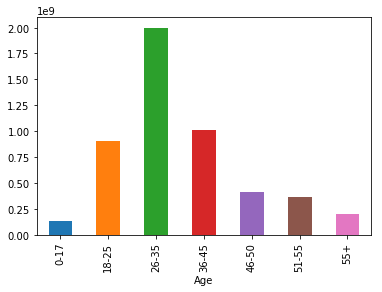

In [9]:
def f(x):
    return Series({"Purchase amount":x['Purchase'].sum()})
     
dic={1:dat.groupby('Gender').apply(f),2:dat.groupby('Age').apply(f),3:dat.groupby("Occupation").apply(f),
     4:dat.groupby("City_Category").apply(f),5:dat.groupby("Marital_Status").apply(f),
     6:dat.groupby("Product_Category_1").apply(f)}
print("Hi Manager ..........")
print("1.Gender_Wise\n2.Age_Wise\n3.Occupation\n4.City_Category\n5.Marital_status\n6.Product_Category")
option=int(input("Enter an option"))
da=dic.get(option)
print(da)
da['Purchase amount'].plot(kind='bar')


          


In [10]:
dat.shape

(537577, 10)

In [11]:
dat.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,23961.000000


In [12]:
dat.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [13]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


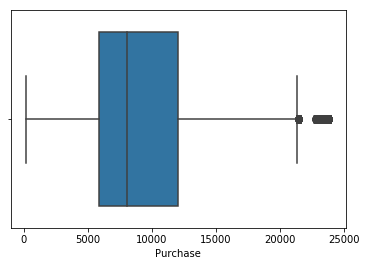

In [14]:
sns.boxplot(dat['Purchase'])
plt.show()

C:\Users\Naga Ranjith\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


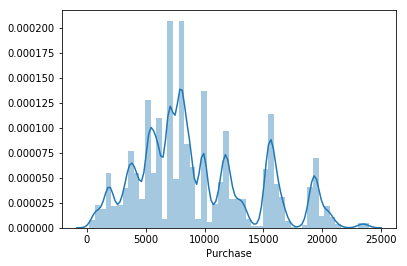

In [15]:
sns.distplot(dat['Purchase'])
plt.show()

In [16]:
print("skewness :{}".format(dat['Purchase'].skew()))

skewness :0.6242797316083074


In [17]:
print("Kutosis : {}".format(dat['Purchase'].kurtosis()))

Kutosis : -0.34312137256836284


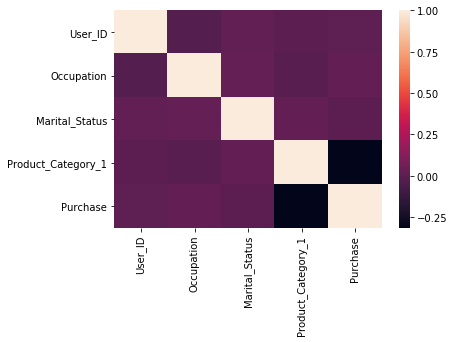

In [18]:
coormatrix=dat.corr()
sns.heatmap(coormatrix)
plt.show()

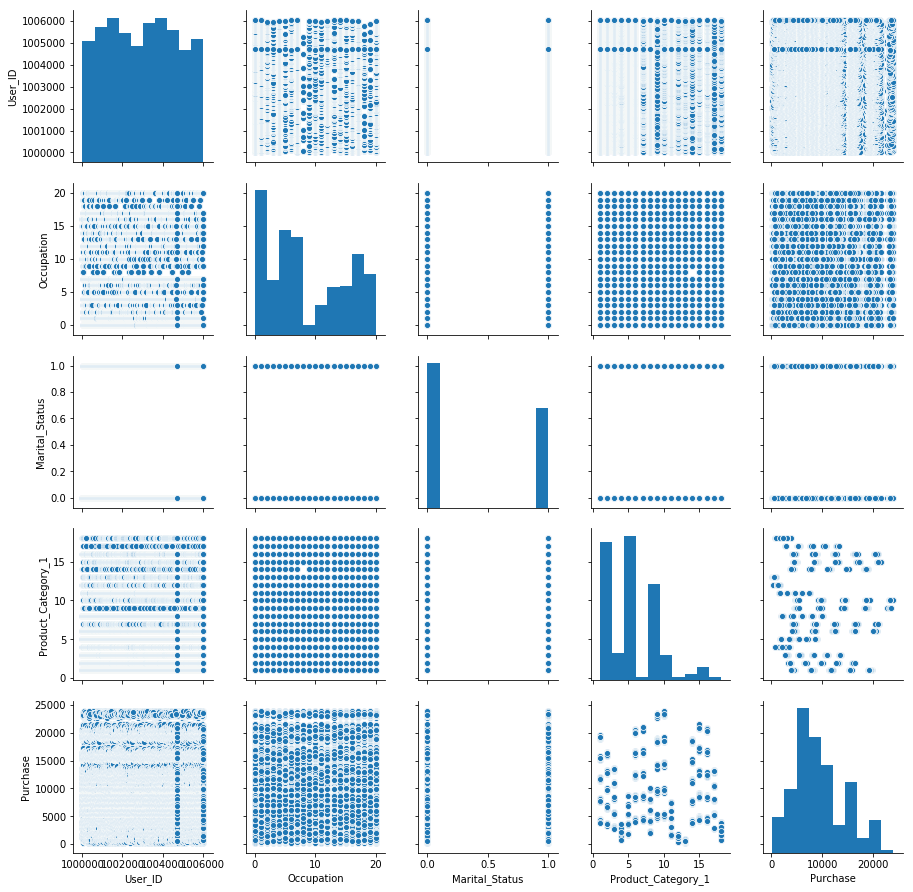

In [20]:
col=['User_ID','Occupation','Marital_Status','Product_Category_1','Purchase']
sns.pairplot(dat[col],height=2.5)
plt.show()